# Visualization

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## The plot Method
- By default, the `plot` method renders a line chart, which is ideal for showing trends over time.
- The `plot` method includes all numeric **DataFrame** columns by default. We can choose a subset with the `y` parameter.
- Matplotlib will use the index values for the x-axis and the values for the y-axis.
- Matplotlib will figure out reasonable intervals for the date index (days, months, years, etc.). These options are all customizable.

In [2]:
ibm = pd.read_csv("ibm.csv",parse_dates=["Date"],index_col="Date")
ibm

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,5.04610,5.04610,4.98716,4.98716,5.935630e+05
1962-01-03,4.98716,5.03292,4.98716,5.03292,4.451750e+05
1962-01-04,5.03292,5.03292,4.98052,4.98052,3.995136e+05
1962-01-05,4.97389,4.97389,4.87511,4.88166,5.593215e+05
1962-01-08,4.88166,4.88166,4.75059,4.78972,8.332738e+05
...,...,...,...,...,...
2023-10-05,140.90000,141.70000,140.19000,141.52000,3.223910e+06
2023-10-06,141.40000,142.94000,140.11000,142.03000,3.511347e+06
2023-10-09,142.30000,142.40000,140.68000,142.20000,2.354396e+06


In [3]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15546 entries, 1962-01-02 to 2023-10-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    15546 non-null  float64
 1   High    15546 non-null  float64
 2   Low     15546 non-null  float64
 3   Close   15546 non-null  float64
 4   Volume  15545 non-null  float64
dtypes: float64(5)
memory usage: 728.7 KB


<Axes: xlabel='Date'>

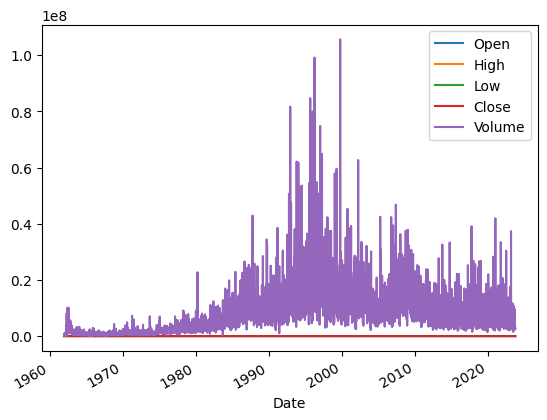

In [4]:
# Just passing the plot() func will plot all column values on Y-axis for the index values on X-axis 
ibm.plot()

<Axes: xlabel='Date'>

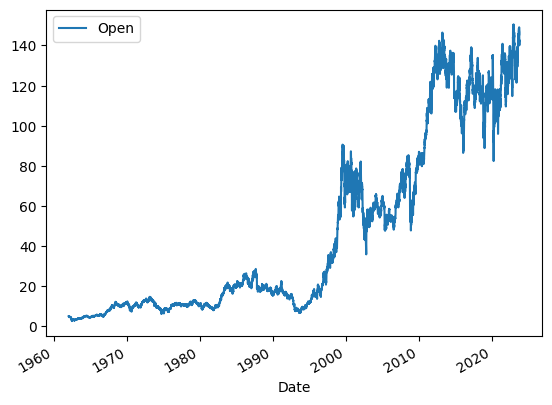

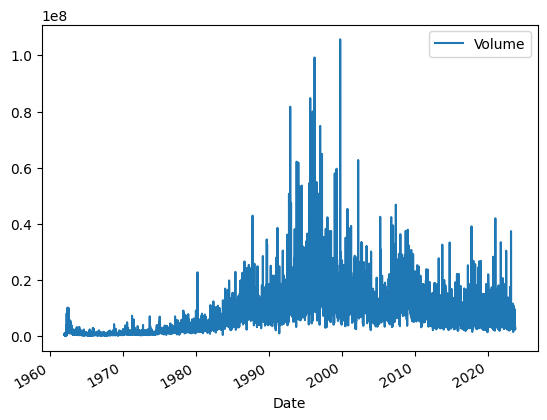

In [5]:
# Set one of the dataframe column as the y-axis
ibm.plot(y="Open")
ibm.plot(y="Volume")



<Axes: xlabel='Date'>

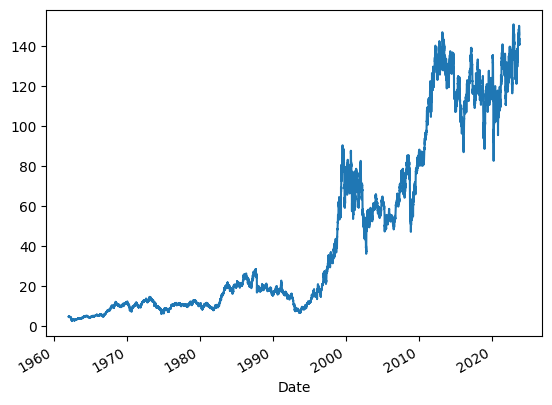

In [6]:
# Plotting only for a series
ibm["Close"].plot()

## Modifying Plot Aesthetics with Templates
- The `plt.style.available` attribute returns a list of available styles.
- Use the `plt.style.use` method and pass in a sample style string.
- The next charts/graphs you render will implement that style.

In [7]:
ibm.head()

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,5.04610,5.04610,4.98716,4.98716,593562.955237
1962-01-03,4.98716,5.03292,4.98716,5.03292,445175.034277
1962-01-04,5.03292,5.03292,4.98052,4.98052,399513.586679
1962-01-05,4.97389,4.97389,4.87511,4.88166,559321.480565
1962-01-08,4.88166,4.88166,4.75059,4.78972,833273.771393


In [8]:
# Exploring the available styles in matplotlib. tHese are basically themes that we can apply to our plots
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

##### **Note:**  Defining a style in one of the cells defines the style for all following cells.
It can also apply to all cells throughout the notebook if we run all cells together

<Axes: xlabel='Date'>

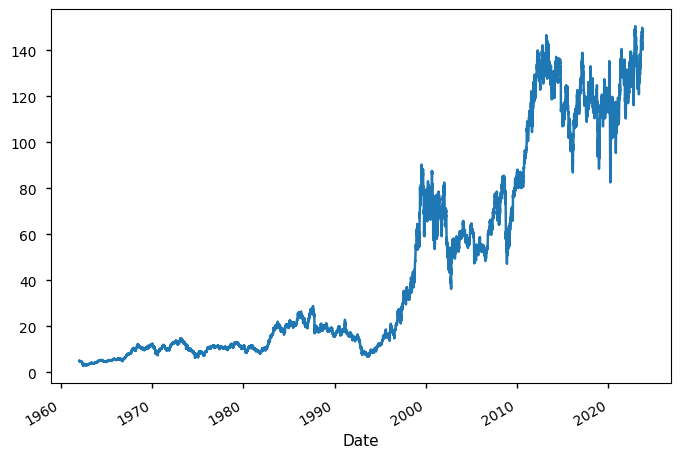

In [9]:
# Apply one of the styles form the module to our plot
plt.style.use("seaborn-v0_8-notebook")
ibm["Close"].plot()

## Bar Charts
- A bar chart uses bars to **represent occurrences of values/categories**.
- We can customize the type of plot that matplotlib renders with the `kind` parameter.
- Pass `bar` for a bar graph and `barh` for a horizontal bar graph.

In [10]:
# Creating a func to be applied on the dataset
# Check the Closing price & assign a rank -- Poor/Avg/Excellent -- create a new column for it
def stock_rank(price):
    if price <=50:
        return "Poor"
    elif price >50 and price<=100:
        return "Average"
    elif price >100:
        return "Excellent"

In [11]:
# Applying func to the Closing stock price
ibm["Close"].apply(stock_rank)

Date
1962-01-02         Poor
1962-01-03         Poor
1962-01-04         Poor
1962-01-05         Poor
1962-01-08         Poor
                ...    
2023-10-05    Excellent
2023-10-06    Excellent
2023-10-09    Excellent
2023-10-10    Excellent
2023-10-11    Excellent
Name: Close, Length: 15546, dtype: object

In [12]:
# Checking a cumulative summarry of these values
ibm["Close"].apply(stock_rank).value_counts()

Close
Poor         9423
Excellent    3085
Average      3038
Name: count, dtype: int64

##### Note that bar charts are the best way to visualize counting occurrences -- the catgories _(each of the ranks in this case)_ make up the X-axis while the variable _(values count)_ make up the Y-axis

<Axes: xlabel='Close'>

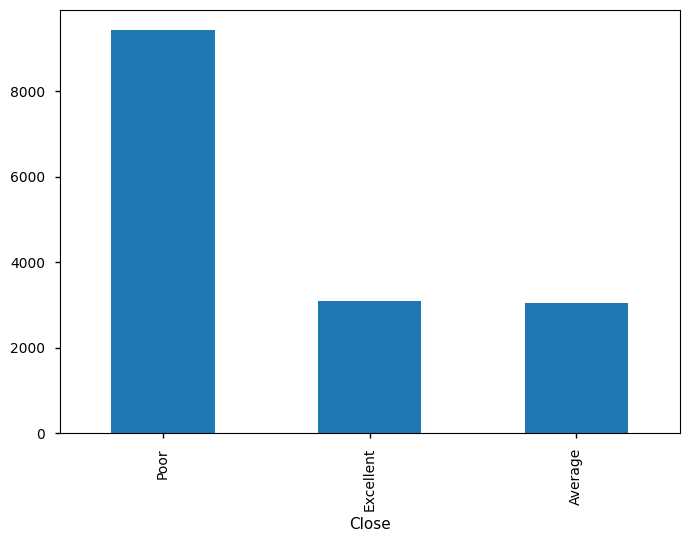

In [13]:
# Now plotting these value
ibm["Close"].apply(stock_rank).value_counts().plot(kind="bar")

<Axes: ylabel='Close'>

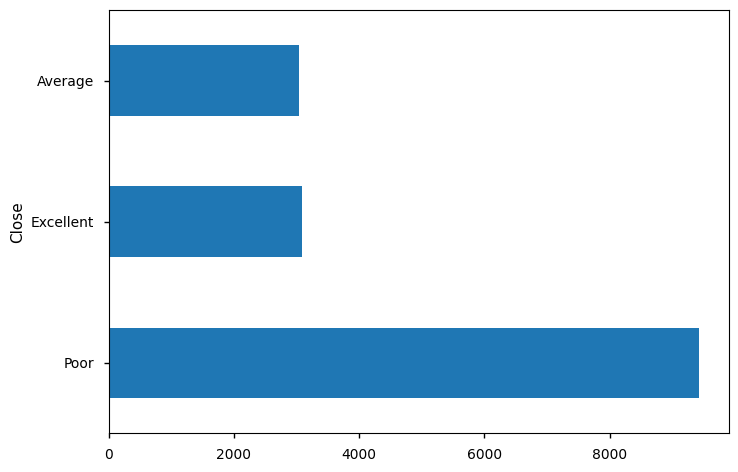

In [14]:
ibm["Close"].apply(stock_rank).value_counts().plot(kind="barh")

## Pie Charts
- A pie chart uses a circle to represent proportions (how much each chunk contributes to the whole).
- Pass the `kind` parameter an argument of "pie".
- The `legend` parameter renders a legend to map colors to labels.

<Axes: ylabel='count'>

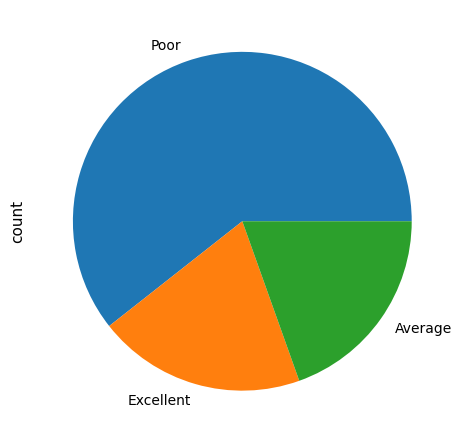

In [15]:
ibm["Close"].apply(stock_rank).value_counts().plot(kind="pie")

##### Finding the proportion of stock prices above or below average
Similar to previous example, we'll apply a func that identifies if the price is above or below average and assigns rank (Above Average/ Below Average)

In [16]:
avg_price = ibm["Close"].mean()
def stock_quality(price):
    if price >= avg_price:
        return "Above Average"
    else:
        return "Below average"

In [17]:
ibm["Close"].apply(stock_quality)
ibm["Close"].apply(stock_quality).value_counts()

Close
Below average    9305
Above Average    6241
Name: count, dtype: int64

<Axes: ylabel='count'>

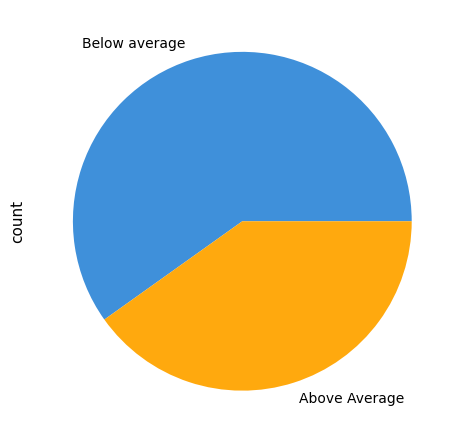

In [18]:
plt.style.use("petroff10")
ibm["Close"].apply(stock_quality).value_counts().plot(kind="pie")

***End Of Section***
___